In [1]:
MARGIN=1.3
LEARNING_RATE=0.001

In [2]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.patheffects as PathEffects
import sys
sys.path
sys.executable

'D:\\my_program\\anaconda\\envs\\py3tf14\\python.exe'

In [3]:
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate
from keras.models import Model, Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
from keras import regularizers
import os
import pickle
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
from itertools import permutations
import seaborn as sns
from keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.svm import SVC

In [5]:
import cv2
import os
import numpy as np
from PIL import Image
import shutil

In [6]:
# Define our own plot function
def scatter(x, labels, num_of_labels, subtitle=None):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", num_of_labels))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    
    
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    # 그래프 규격선, 여백공간 제거
    ax.axis('off') 
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(num_of_labels):
        # Add Label with txt type on plotting image
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    if subtitle != None:
        plt.suptitle(subtitle)
        
    plt.savefig(subtitle)
    
def checkImgSet(msg, x_sample, y_sample, filename_sample, classes, maxnum):

    print(msg)
    for k in range(classes):
        plt.figure(figsize=(20,20))
    
        num=0
        for i in range(len(y_sample)):
            if num==maxnum:
                break
            if y_sample[i]==k:
                num+=1
                plt.subplot(10,10,num)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(x_sample[i], cmap='gray', vmin=0, vmax=255)
                #plt.imshow(cv2.cvtColor(x_sample[i], cv2.COLOR_BGR2RGB))
                if(filename_sample[i].find("test")>0):
                    tmp = filename_sample[i].find("test")
                else :
                    tmp = filename_sample[i].find("train")
                plt.xlabel(str(y_sample[i])+filename_sample[i][tmp:])
        plt.show()
        
def checkTripletImgSet(msg, triplet_sample, maxnum):

    print(msg)
    plt.figure(figsize=(15,15*maxnum))
    for i in range(min(maxnum, len(triplet_sample))):
        for j in range(3):
            plt.subplot(5*maxnum, 3,i*3+j+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(triplet_sample[i][j].reshape(28,28), cmap='gray', vmin=0, vmax=255)
            #plt.imshow(cv2.cvtColor(triplet_sample[i][j].reshape(28,28), cv2.COLOR_BGR2RGB))
    plt.show()

In [7]:
def divide_data():
    path = "C:\\Users\\tjems\\Desktop\\wine\\total"
    # Get directory has yoga poses
    DataPaths = [path+'\\'+folder_name for folder_name in os.listdir(path)]
    print(DataPaths)
    for label_idx in range(len(DataPaths)):
        LabelPath = DataPaths[label_idx]
        if not os.path.isdir(LabelPath+'\\test'):
            os.mkdir(LabelPath+'\\test')
        if not os.path.isdir(LabelPath+'\\train'):
            os.mkdir(LabelPath+'\\train')
            
    # Check each image folders. each image folder contains images with same yoga posture 
    for label_idx in range(len(DataPaths)):
        LabelPath = DataPaths[label_idx]
        if 'test' in LabelPath or 'train' in LabelPath:
            continue
        ImgNames = [image_name for image_name in os.listdir(LabelPath)]
        for img_idx in range(len(ImgNames)):
            path_from = LabelPath+'\\'+ImgNames[img_idx]
            if 'test' in path_from or 'train' in path_from:
                continue
            if img_idx%7 == 0:
                path_to = LabelPath+'\\test'
            else:
                path_to = LabelPath+'\\train'
            print(path_to)
            print(path_from)
            shutil.move(path_from, path_to)
    

In [8]:
def load_data(path, row, column, channel):
    x_train=[]
    y_train=[]
    filename_train=[]
    x_test=[]
    y_test=[]
    filename_test=[]
    # Get directory has yoga poseschannel
    DataPaths = [path+'\\'+folder_name for folder_name in os.listdir(path)]
    #print(DataPaths)
    # Check each image folders. each image folder contains images with same yoga posture 
    for label_idx in range(len(DataPaths)):
        LabelPath = DataPaths[label_idx]
        
        # Check each kinds of data. Training samples and Validation samples
        sample_kind=['\\train\\', '\\test\\']
        for k in range(2):
            ImgPaths = [LabelPath+sample_kind[k]+image_name for image_name in os.listdir(LabelPath+sample_kind[k])]
            for idx in range(len(ImgPaths)):
                imagePath = ImgPaths[idx]
                img = cv2.imread(imagePath, cv2.IMREAD_COLOR)
               
            
                cv2.imshow('img', img)

                if channel==1:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                img = cv2.resize(img, (row,column), interpolation = cv2.INTER_AREA)
                
                if k==0:
                    x_train.append(img)
                    y_train.append(label_idx)
                    filename_train.append(imagePath)
                else:    
                    x_test.append(img)
                    y_test.append(label_idx)
                    filename_test.append(imagePath)
              
        
    return np.array(x_train), np.array(y_train), filename_train, np.array(x_test), np.array(y_test), filename_test

In [9]:
def nameing():
    path = "C:\\Users\\tjems\\Desktop\\wine\\total"
    DataPaths = [path+'\\'+folder_name for folder_name in os.listdir(path)]
    count2=1
    for label_idx in range(len(DataPaths)):
        LabelPath = DataPaths[label_idx]#each wine forder
        print(LabelPath)
        DataPaths_test =[LabelPath+'\\test\\' + image_name for image_name in os.listdir(LabelPath+'\\test')]
        #print(DataPaths_test)
        DataPaths_train=[LabelPath+'\\train\\' + image_name for image_name in os.listdir(LabelPath+'\\train')]
        #print(DataPaths_train)
        count=1
        for image_route in DataPaths_test:
            after=image_route.split('\\')
            after2=after[-1].split('.')
            os.rename(image_route,image_route[:image_route.find(after[-1])]+str(count)+'.'+after2[-1])
            count=count+1
            print (image_route)
            print(image_route[:image_route.find(after[-1])]+str(count)+'.'+after2[-1])
        count=1
        for image_route in DataPaths_train:
            after=image_route.split('\\')
            after2=after[-1].split('.')
            os.rename(image_route,image_route[:image_route.find(after[-1])]+str(count)+'.'+after2[-1])
            count=count+1
            print (image_route)
            print(image_route[:image_route.find(after[-1])]+str(count)+'.'+after2[-1])
            
        #after = LabelPath.split('\\')
        #os.rename(LabelPath,LabelPath[:LabelPath.find(after[-1])]+str(count2))
        #count2=count2+1
            #image_route.split('\\')
            #print(image_route)
        #os.rename(image_route,image_route[:image_route.find(after)]+count+'.'+image_route[-1])

            
    

In [13]:
img_row=28
img_column=28
img_channel=1
path = "C:\\Users\\tjems\\Desktop\\wine\\total"


#사진 1장당 28*28*1 (가로*세로*채널)로 입력된다.
x_train, y_train, filename_train, x_test, y_test, filename_test = load_data(path,img_row, img_column, img_channel)
#make total data set
x_total = np.array(np.concatenate((x_train, x_test), axis = 0))
y_total = np.array(np.concatenate((y_train, y_test), axis = 0))
#make total file name set
filename_total = np.concatenate((filename_train, filename_test), axis = 0)


In [14]:
print("before shape : ",x_train.shape, x_test.shape, x_total.shape)
x_train_flat = x_train.reshape(-1,img_row*img_column*img_channel)
x_test_flat = x_test.reshape(-1,img_row*img_column*img_channel)                           
x_total_flat = x_total.reshape(-1,img_row*img_column*img_channel)
print("after flat shape : ",x_train_flat.shape, x_test_flat.shape, x_total_flat.shape)

before shape :  (1641, 28, 28) (280, 28, 28) (1921, 28, 28)
after flat shape :  (1641, 784) (280, 784) (1921, 784)


Training Samples


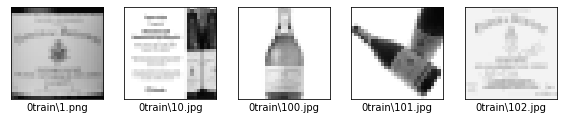

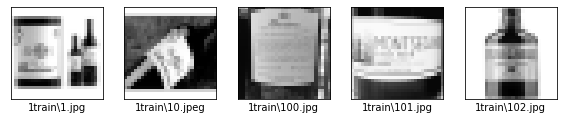

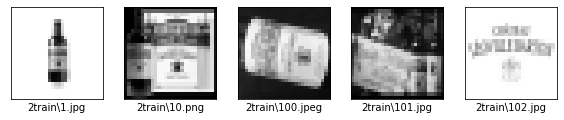

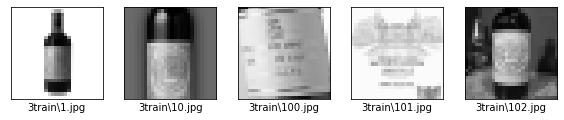

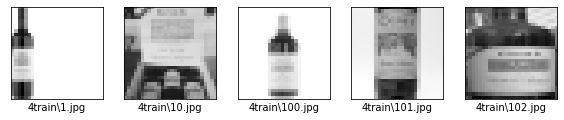

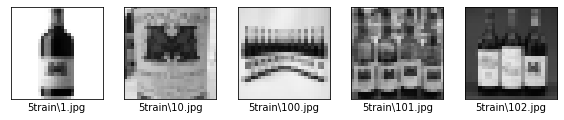

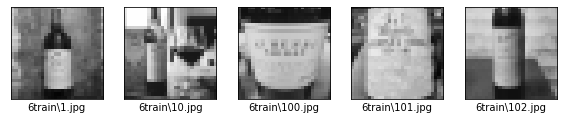

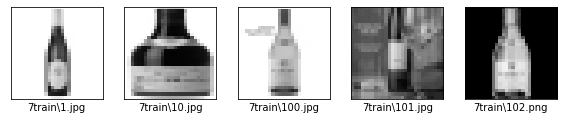

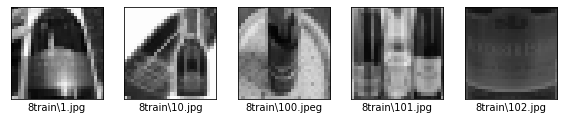

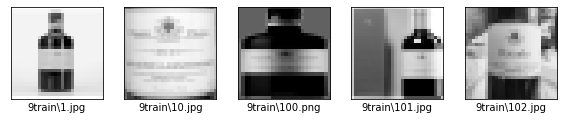

Validation Samples


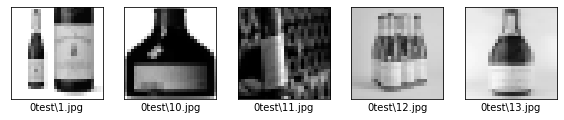

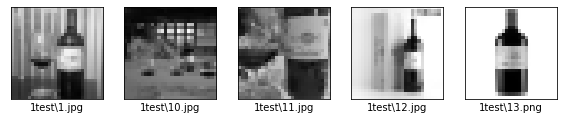

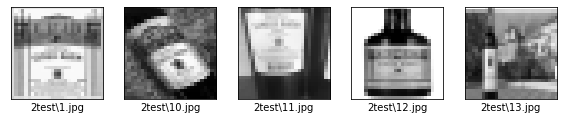

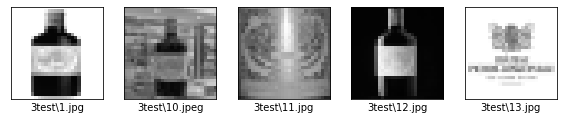

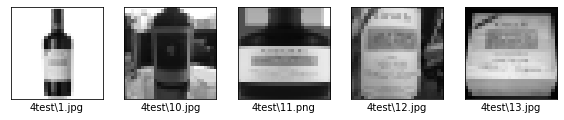

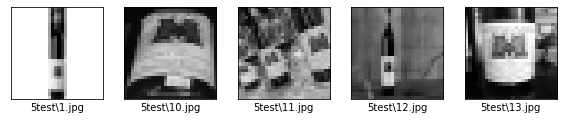

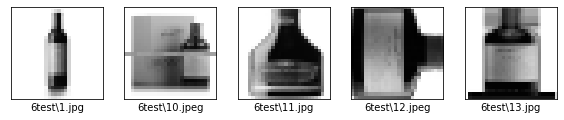

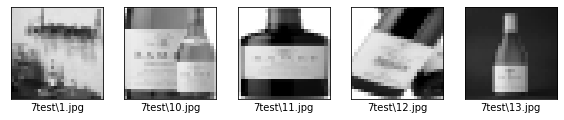

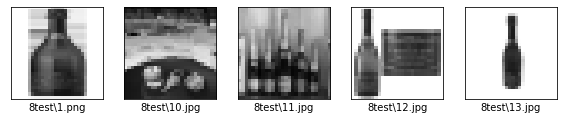

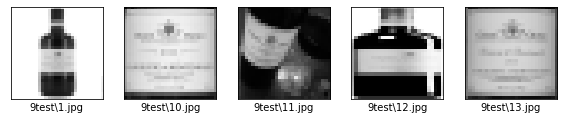

In [15]:
checkImgSet("Training Samples", x_train, y_train, filename_train, 10, 5)
checkImgSet("Validation Samples", x_test, y_test, filename_test, 10, 5)

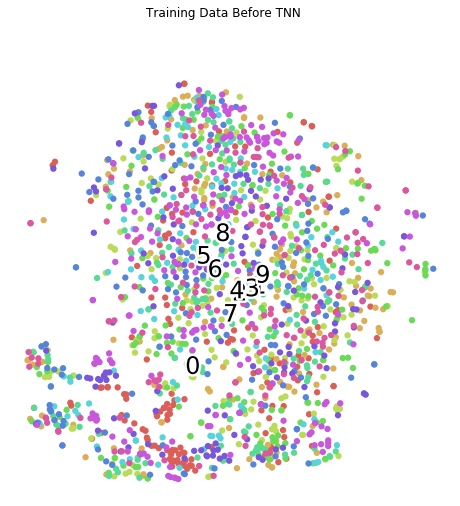

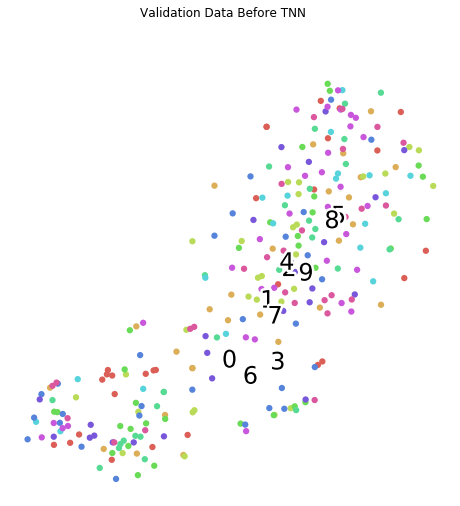

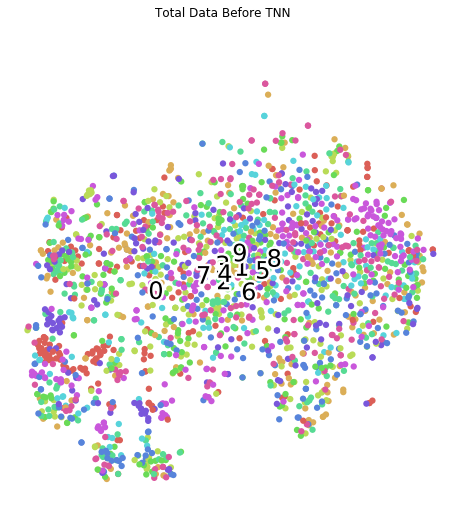

In [13]:
tsne = TSNE()
train_tsne_embeds = tsne.fit_transform(x_train_flat[:1641])
eval_tsne_embeds = tsne.fit_transform(x_test_flat[:280])
total_tsne_embeds = tsne.fit_transform(x_total_flat[:1921])
scatter(train_tsne_embeds, y_train[:1641], 10, "Training Data Before TNN")
scatter(eval_tsne_embeds, y_test[:280], 10, "Validation Data Before TNN")
scatter(total_tsne_embeds, y_total[:1921], 10,"Total Data Before TNN")

In [17]:
def shuffle(x_total, y_total, filename_total, shuffled_idx_path):
    idxs = np.arange(x_total.shape[0])
    np.random.shuffle(idxs)
    
    # save shuffle data. next time reload this shuffed pattern
    np.savetxt(shuffled_idx_path, idxs, delimiter=",")
    
    shuffled_filename_total=[]
    shuffled_x_total=[]
    shuffled_y_total=[]
    for idx in range(len(filename_total)):
        shuffled_filename_total.append(filename_total[idxs[idx]])
        shuffled_x_total.append(x_total[idxs[idx]])
        shuffled_y_total.append(y_total[idxs[idx]])
    
    return np.array(shuffled_x_total), np.array(shuffled_y_total), np.array(shuffled_filename_total)
    #return x_total[idxs], y_total[idxs], shuffled_filename_total

In [18]:
x_train, y_train, filename_train = shuffle(x_train, y_train, filename_train, "shuffle_train.csv")
x_test, y_test, filename_test = shuffle(x_test, y_test, filename_test, "shuffle_test.csv")
x_total, y_total, filename_total = shuffle(x_total, y_total, filename_total, "shuffle_total.csv")

In [22]:
def generate_triplet(x,y,testsize=0.3,ap_pairs=10,an_pairs=10):
    print("starting generate_triplet_pair")
    print("x shape : ", x.shape,"   y shape : ", y.shape)
    data_xy = tuple([x,y])
    print("xy_shape : ", data_xy[1].shape)
    
    trainsize = 1-testsize
    
    triplet_train_pairs = []
    triplet_test_pairs = []
    for data_class in sorted(set(data_xy[1])):
        same_class_idx = np.where(data_xy[1] == data_class)[0]
        diff_class_idx = np.where(data_xy[1] != data_class)[0]
        
        # num of each: ap_pairs, an_pairs
        A_P_pairs = random.sample(list(permutations(same_class_idx,2)),k=ap_pairs) #Generating Anchor-Positive pairs
        Neg_idx = random.sample(list(diff_class_idx),k=an_pairs)
        
        #total data: ap_pairs*an_pairs
        A_P_len = len(A_P_pairs)
        Neg_len = len(Neg_idx)
        
        for ap in A_P_pairs[:int(A_P_len*trainsize)]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            for n in Neg_idx:
                Negative = data_xy[0][n]
                triplet_train_pairs.append([Anchor,Positive,Negative])
                
        #test
        for ap in A_P_pairs[int(A_P_len*trainsize):]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            for n in Neg_idx:
                Negative = data_xy[0][n]
                triplet_test_pairs.append([Anchor,Positive,Negative])    
                
    return np.array(triplet_train_pairs), np.array(triplet_test_pairs)

In [20]:
def generate_triplet_2(x,y,testsize=0.3,ap_pairs=10,an_pairs=10):
    print(x.shape, y.shape)
    data_xy = tuple([x,y])
    print(data_xy[1].shape)
    
    trainsize = 1-testsize
    
    triplet_train_pairs = []
    triplet_test_pairs = []
    for data_class in sorted(set(data_xy[1])):
        same_class_idx = np.where(data_xy[1] == data_class)[0]
        diff_class_idx = np.where(data_xy[1] != data_class)[0]
        
        # num of each: ap_pairs, an_pairs
        A_P_pairs = random.sample(list(permutations(same_class_idx,2)),k=ap_pairs) #Generating Anchor-Positive pairs
        Neg_idx = random.sample(list(diff_class_idx),k=an_pairs)
        
        #total data: ap_pairs*an_pairs
        A_P_len = len(A_P_pairs)
        Neg_len = len(Neg_idx)
        ng_idx=0
        
        for ap in A_P_pairs[:int(A_P_len*trainsize)]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            Negative = data_xy[0][Neg_idx[ng_idx%Neg_len]]
            triplet_train_pairs.append([Anchor,Positive,Negative])
            ng_idx+=1
            
        #test
        for ap in A_P_pairs[int(A_P_len*trainsize):]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            Negative = data_xy[0][Neg_idx[ng_idx%Neg_len]]
            triplet_test_pairs.append([Anchor,Positive,Negative])
            ng_idx+=1
                
    return np.array(triplet_train_pairs), np.array(triplet_test_pairs)

In [21]:
def generate_triplet_all(x,y,testsize=0.3):
    print(x.shape, y.shape)
    data_xy = tuple([x,y])
    print(data_xy[1].shape)
    
    trainsize = 1-testsize
    
    triplet_train_pairs = []
    triplet_test_pairs = []
    for data_class in sorted(set(data_xy[1])):
        same_class_idx = np.where(data_xy[1] == data_class)[0]
        diff_class_idx = np.where(data_xy[1] != data_class)[0]
        
        # num of each: ap_pairs, an_pairs
        A_P_pairs = list(permutations(same_class_idx,2)) #Generating Anchor-Positive pairs
        Neg_idx = list(diff_class_idx)

        #total data: ap_pairs*an_pairs
        A_P_len = len(A_P_pairs)
        Neg_len = len(Neg_idx)
        ng_idx=0
        
        #train
        for ap in A_P_pairs[:int(A_P_len*trainsize)]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            Negative = data_xy[0][Neg_idx[ng_idx%Neg_len]]
            triplet_train_pairs.append([Anchor,Positive,Negative])
            ng_idx+=1
            
        #test
        for ap in A_P_pairs[int(A_P_len*trainsize):]:
            Anchor = data_xy[0][ap[0]]
            Positive = data_xy[0][ap[1]]
            Negative = data_xy[0][Neg_idx[ng_idx%Neg_len]]
            triplet_test_pairs.append([Anchor,Positive,Negative])
            ng_idx+=1  
                
    return np.array(triplet_train_pairs), np.array(triplet_test_pairs)

In [23]:
#total triplet data set: class * ap_pairs * an_pairs
#divide it to two data set with scaling (1-test_size, test_size)
x_train_triplet, x_test_triplet = generate_triplet(x_train_flat,y_train, ap_pairs=150, an_pairs=150,testsize=0.2)
print(x_train_triplet.shape, x_test_triplet.shape)
#x_train_triplet, x_test_triplet = generate_triplet_2(x_train_flat,y_train, ap_pairs=150*150, an_pairs=150,testsize=0.2)
#print(x_train_triplet.shape, x_test_triplet.shape)
#x_train_triplet, x_test_triplet = generate_triplet_all(x_train_flat,y_train,testsize=0.2)
#print(x_train_triplet.shape, x_test_triplet.shape)
#checkTripletImgSet("Training Samples", x_train_triplet,20)

starting generate_triplet_pair
x shape :  (1641, 784)    y shape :  (1641,)
xy_shape :  (1641,)
(180000, 3, 784) (45000, 3, 784)


In [25]:
def create_base_network(in_dims):
    
    model = Sequential()
    model.add(Conv2D(128,(7,7),padding='same',input_shape=(in_dims[0],in_dims[1],in_dims[2],),activation='relu',name='conv1'))
    model.add(MaxPooling2D((2,2),(2,2),padding='same',name='pool1'))
    model.add(Conv2D(256,(10,10),padding='same',activation='relu',name='conv2'))
    model.add(MaxPooling2D((2,2),(2,2),padding='same',name='pool2'))
    model.add(Flatten(name='flatten'))
    model.add(Dense(4,name='embeddings'))
    return model

In [26]:
def triplet_loss(y_true, y_pred, alpha = MARGIN):
    
    print('y_pred.shape = ',y_pred)
    
    total_lenght = y_pred.shape.as_list()[-1]
#     print('total_lenght=',  total_lenght)
#     total_lenght =12
    
    anchor = y_pred[:,0:int(total_lenght*1/3)]
    positive = y_pred[:,int(total_lenght*1/3):int(total_lenght*2/3)]
    negative = y_pred[:,int(total_lenght*2/3):int(total_lenght*3/3)]

    # distance between the anchor and the positive
    pos_dist = K.sum(K.square(anchor-positive),axis=1)

    # distance between the anchor and the negative
    neg_dist = K.sum(K.square(anchor-negative),axis=1)

    # compute loss
    basic_loss = pos_dist-neg_dist+alpha
    loss = K.maximum(basic_loss,0.0)
 
    return loss

In [65]:
'''
for MARGIN in [1.1, 1.2, 1.3, 1.4]:
    for LEARNING_RATE in [0.001, 0.0005, 0.0001, 0.00005, 0.00001]:
        #---------------------------------------------------------------------------------------------------
        adam_optim = Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999)
        #---------------------------------------------------------------------------------------------------
        input_row=28
        input_column=28
        input_channel=1
        anchor_input = Input((input_row, input_column, input_channel, ), name='anchor_input')
        positive_input = Input((input_row, input_column, input_channel, ), name='positive_input')
        negative_input = Input((input_row, input_column, input_channel, ), name='negative_input')

        # Shared embedding layer for positive and negative items
        Shared_DNN = create_base_network([input_row, input_column, input_channel,])


        encoded_anchor = Shared_DNN(anchor_input)
        encoded_positive = Shared_DNN(positive_input)
        encoded_negative = Shared_DNN(negative_input)


        merged_vector = concatenate([encoded_anchor, encoded_positive, encoded_negative], axis=-1, name='merged_layer')

        model = Model(inputs=[anchor_input,positive_input, negative_input], outputs=merged_vector)
        #---------------------------------------------------------------------------------------------------
        model.compile(loss=triplet_loss, optimizer=adam_optim)
        model.summary()
        #---------------------------------------------------------------------------------------------------
        Anchor = x_train_triplet[:,0,:].reshape(-1,input_row, input_column, input_channel)
        Positive = x_train_triplet[:,1,:].reshape(-1,input_row, input_column, input_channel)
        Negative = x_train_triplet[:,2,:].reshape(-1,input_row, input_column, input_channel)

        Anchor_test = x_test_triplet[:,0,:].reshape(-1,input_row, input_column, input_channel)
        Positive_test = x_test_triplet[:,1,:].reshape(-1,input_row, input_column, input_channel)
        Negative_test = x_test_triplet[:,2,:].reshape(-1,input_row, input_column, input_channel)


        Y_dummy = np.empty((Anchor.shape[0],300))
        Y_dummy2 = np.empty((Anchor_test.shape[0],1))
        #---------------------------------------------------------------------------------------------------
        model.fit([Anchor,Positive,Negative],y=Y_dummy,validation_data=([Anchor_test,Positive_test,Negative_test],Y_dummy2), batch_size=512, epochs=500)
        model.fit([Anchor,Positive,Negative],y=Y_dummy,validation_data=([Anchor_test,Positive_test,Negative_test],Y_dummy2), batch_size=512, epochs=20)
        MODEL_SAVE_FOLDER_PATH = './Presentation_Files/'
        LOG_SAVE_FOLDER_PATH = './Presentation_Files/'
        model_path = MODEL_SAVE_FOLDER_PATH + str(LEARNING_RATE+MARGIN)+'-{val_loss:.4f}-{epoch:02d}.hdf5'
        log_path = LOG_SAVE_FOLDER_PATH + str(LEARNING_RATE+MARGIN)+'-log.csv'

        csv_logger = CSVLogger(log_path, append=True, separator=';')
        cb_early_stopping = EarlyStopping(monitor='val_loss', patience=10)
        cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
        model_history= model.fit([Anchor,Positive,Negative],y=Y_dummy,validation_data=([Anchor_test,Positive_test,Negative_test],Y_dummy2), batch_size=2048, epochs=100, callbacks=[csv_logger,cb_early_stopping,cb_checkpoint])
        #---------------------------------------------------------------------------------------------------
        model_json = model.to_json()
        with open(MODEL_SAVE_FOLDER_PATH + str(LEARNING_RATE+MARGIN), "w") as json_file : 
            json_file.write(model_json)

        model.save_weights(MODEL_SAVE_FOLDER_PATH + str(LEARNING_RATE+MARGIN)+".h5")
        print("Saved model to disk")
'''

y_pred.shape =  Tensor("merged_layer_1/concat:0", shape=(None, 12), dtype=float32)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anchor_input (InputLayer)       (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
positive_input (InputLayer)     (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
negative_input (InputLayer)     (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 4)            3333636     anchor_input[0][0]               
         

KeyboardInterrupt: 

In [ ]:
#---------------------------------------------------------------------------------------------------
adam_optim = Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999)
#---------------------------------------------------------------------------------------------------
input_row=28
input_column=28
input_channel=1
anchor_input = Input((input_row, input_column, input_channel, ), name='anchor_input')
positive_input = Input((input_row, input_column, input_channel, ), name='positive_input')
negative_input = Input((input_row, input_column, input_channel, ), name='negative_input')

# Shared embedding layer for positive and negative items
Shared_DNN = create_base_network([input_row, input_column, input_channel,])


encoded_anchor = Shared_DNN(anchor_input)
encoded_positive = Shared_DNN(positive_input)
encoded_negative = Shared_DNN(negative_input)


merged_vector = concatenate([encoded_anchor, encoded_positive, encoded_negative], axis=-1, name='merged_layer')

model = Model(inputs=[anchor_input,positive_input, negative_input], outputs=merged_vector)
#---------------------------------------------------------------------------------------------------
model.compile(loss=triplet_loss, optimizer=adam_optim)
model.summary()
#---------------------------------------------------------------------------------------------------
Anchor = x_train_triplet[:,0,:].reshape(-1,input_row, input_column, input_channel)
Positive = x_train_triplet[:,1,:].reshape(-1,input_row, input_column, input_channel)
Negative = x_train_triplet[:,2,:].reshape(-1,input_row, input_column, input_channel)

Anchor_test = x_test_triplet[:,0,:].reshape(-1,input_row, input_column, input_channel)
Positive_test = x_test_triplet[:,1,:].reshape(-1,input_row, input_column, input_channel)
Negative_test = x_test_triplet[:,2,:].reshape(-1,input_row, input_column, input_channel)


Y_dummy = np.empty((Anchor.shape[0],300))
Y_dummy2 = np.empty((Anchor_test.shape[0],1))
 #---------------------------------------------------------------------------------------------------
#model.fit([Anchor,Positive,Negative],y=Y_dummy,validation_data=([Anchor_test,Positive_test,Negative_test],Y_dummy2), batch_size=512, epochs=500)
#model.fit([Anchor,Positive,Negative],y=Y_dummy,validation_data=([Anchor_test,Positive_test,Negative_test],Y_dummy2), batch_size=512, epochs=20)
MODEL_SAVE_FOLDER_PATH = './'
LOG_SAVE_FOLDER_PATH = './'
model_path = MODEL_SAVE_FOLDER_PATH + str(LEARNING_RATE+MARGIN)+'-{val_loss:.4f}-{epoch:02d}.hdf5'
log_path = LOG_SAVE_FOLDER_PATH + str(LEARNING_RATE+MARGIN)+'-log.csv'

csv_logger = CSVLogger(log_path, append=True, separator=';')
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=5)
cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
model_history= model.fit([Anchor,Positive,Negative],y=Y_dummy,validation_data=([Anchor_test,Positive_test,Negative_test],Y_dummy2), batch_size=64, epochs=100, callbacks=[csv_logger,cb_early_stopping,cb_checkpoint])
#---------------------------------------------------------------------------------------------------
model_json = model.to_json()
with open(MODEL_SAVE_FOLDER_PATH + str(LEARNING_RATE+MARGIN), "w") as json_file : 
    json_file.write(model_json)

model.save_weights(MODEL_SAVE_FOLDER_PATH + str(LEARNING_RATE+MARGIN)+".h5")
print("Saved model to disk")

y_pred.shape =  Tensor("merged_layer_4/concat:0", shape=(None, 12), dtype=float32)
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anchor_input (InputLayer)       (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
positive_input (InputLayer)     (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
negative_input (InputLayer)     (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 4)            3333636     anchor_input[0][0]               
         